#### Using Multiple Features

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# use the same dataset
df = pd.read_csv('../data/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop('sales', axis = 1)
y = df['sales']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modeling
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)


In [6]:
y_hat

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [7]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_hat)

3.174097353976104

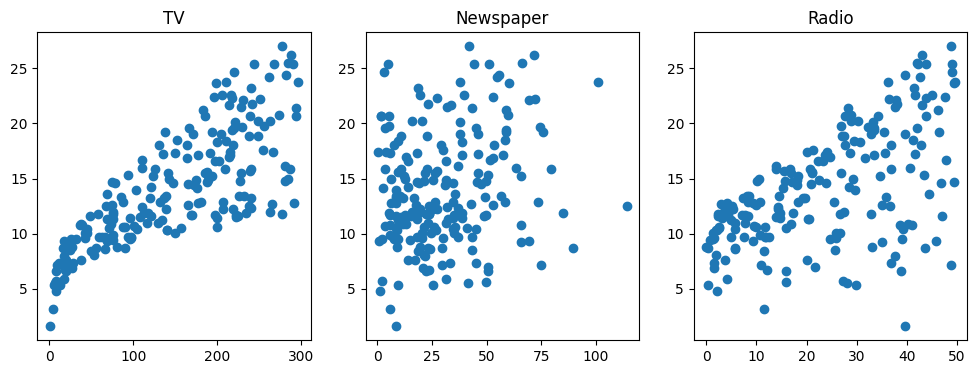

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (12, 4))
axes[0].scatter(df['TV'], df['sales'])
axes[0].set_title('TV')
axes[1].scatter(df['newspaper'], df['sales'])
axes[1].set_title('Newspaper')
axes[2].scatter(df['radio'], df['sales'])
axes[2].set_title('Radio')
plt.show()


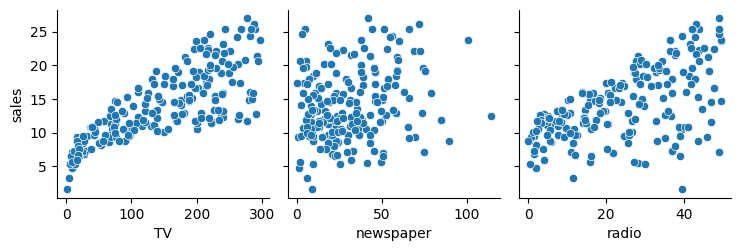

In [14]:
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars=['sales'])

In [16]:
X_train

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [31]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


### Manual Implementation of Train Test Split

In [23]:
# try ourselves
df_2 = df.copy()

In [27]:
df_shuffled = df_2.sample(frac=1, random_state=42)
test_size = int(len(df_shuffled) * 0.2)

# train and test
X_train_manual = df_shuffled.iloc[test_size:, :3]
X_test_manual = df_shuffled.iloc[:test_size, :3]

y_train_manual = df_shuffled.iloc[test_size:, -1]
y_test_manual = df_shuffled.iloc[:test_size, -1]

In [28]:
len(train)

160

In [30]:
X_train_manual

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [32]:
X_test_manual

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5
